In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_json("data/ball_data_33.json")
df=df.T
#let's not consider the frames where the ball is not detected (not visible)
print("Initial number of frames:",df.shape)
df=df[df['visible']==1]
print("Number of frames with ball visible:",df.shape)

Initial number of frames: (337, 4)
Number of frames with ball visible: (278, 4)


In [3]:
#let's gather data about the ball trajectory using windowed approach
w=5
#speed estimation using rolling mean
dx = df['x'].diff().fillna(0.0)

dy = df['y'].diff().fillna(0.0)
df['inst_speed'] = np.sqrt(dx**2 + dy**2)
df['speed_pre'] = df['inst_speed'].shift(1).rolling(window=w).mean().fillna(0.0)
df['speed_post'] = df['inst_speed'].iloc[::-1].rolling(window=w).mean().iloc[::-1].shift(-1).fillna(0.0)
df['delta_speed'] = df['speed_post'] - df['speed_pre']

df['inst_acc'] = df['inst_speed'].diff().fillna(0.0)
df['acc_pre'] = df['inst_acc'].shift(1).rolling(window=w).mean().fillna(0.0)
df['acc_post'] = df['inst_acc'].iloc[::-1].rolling(window=w).mean().iloc[::-1].shift(-1).fillna(0.0)
df['delta_acc'] = df['acc_post'] - df['acc_pre']

df['std_acc_pre'] = df['inst_acc'].shift(1).rolling(window=w).std().fillna(0.0)
df['std_acc_post'] = df['inst_acc'].iloc[::-1].rolling(window=w).std().iloc[::-1].shift(-1).fillna(0.0)
df['stability_change'] = df['std_acc_post'] - df['std_acc_pre']
# df['pre_mean_x']=df['x'].rolling(window=window_size).mean()
# df['pre_mean_y']=df['y'].rolling(window=window_size).mean()
# df['post_mean_x']=df['z'].rolling(window=window_size).mean()
# df['post_mean_y']=df['y'].rolling(window=window_size).mean()

/tmp/ipykernel_152756/500634318.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dx = df['x'].diff().fillna(0.0)
/tmp/ipykernel_152756/500634318.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dy = df['y'].diff().fillna(0.0)


In [4]:
df

,x,y,visible,action,inst_speed,speed_pre,speed_post,delta_speed,inst_acc,acc_pre,acc_post,delta_acc,std_acc_pre,std_acc_post,stability_change
110577,837,670,True,air,0.000000,0.000000,12.428427,12.428427,0.000000,0.000000,2.200000,2.200000,0.000000,7.105939,7.105939
110578,837,656,True,air,14.000000,0.000000,11.828427,11.828427,14.000000,0.000000,-0.600000,-0.600000,0.000000,2.663526,2.663526
110579,835,642,True,air,14.142136,0.000000,11.209072,11.209072,0.142136,0.000000,-0.619355,-0.619355,0.000000,2.657129,2.657129
110580,835,632,True,air,10.000000,0.000000,11.219047,11.219047,-4.142136,0.000000,0.009975,0.009975,0.000000,1.870331,1.870331
110581,835,619,True,air,13.000000,0.000000,10.430124,10.430124,3.000000,0.000000,-0.788923,-0.788923,0.000000,0.847063,0.847063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110874,1312,632,True,air,1.000000,5.088933,0.000000,-5.088933,-2.162278,0.066770,0.000000,-0.066770,2.616764,0.000000,-2.616764
110875,1314,635,True,air,3.605551,4.288933,0.000000,-4.288933,2.605551,-0.800000,0.000000,0.800000,2.458242,0.000000,-2.458242
110876,1316,637,True,air,2.828427,4.115616,0.000000,-4.115616,-0.777124,-0.173317,0.000000,0.173317,2.903958,0.000000,-2.903958
110878,1317,636,True,air,1.414214,3.119251,0.000000,-3.119251,-1.414214,-0.996365,0.000000,0.996365,2.143553,0.000000,-2.143553


In [15]:
df.isna().sum()

x                     0
y                     0
visible               0
action                0
inst_speed            0
speed_pre             0
speed_post            0
delta_speed           0
inst_acc              0
acc_pre               0
acc_post              0
delta_acc             0
std_acc_pre           0
std_acc_post          0
stability_change      0
delta_x_pre           0
delta_y_pre           0
delta_x_post          0
delta_y_post          0
dx                    0
dy                    0
smoothness_angle      0
slope_x_pre           0
slope_y_pre           0
slope_x_post          0
slope_y_post          0
slope_change_x        0
slope_change_y        0
total_slope_change    0
dtype: int64

In [14]:
df['delta_x_pre'] = df['x'].shift(1).fillna(0.0) - df['x'].shift(1 + w).fillna(0.0)
df['delta_y_pre'] = df['y'].shift(1).fillna(0.0) - df['y'].shift(1 + w).fillna(0.0)
df['delta_x_post'] = df['x'].shift(-(1 + w)).fillna(0.0) - df['x'].shift(-1).fillna(0.0)
df['delta_y_post'] = df['y'].shift(-(1 + w)).fillna(0.0) - df['y'].shift(-1).fillna(0.0)

/tmp/ipykernel_152756/4171865543.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['delta_x_pre'] = df['x'].shift(1).fillna(0.0) - df['x'].shift(1 + w).fillna(0.0)
/tmp/ipykernel_152756/4171865543.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['delta_y_pre'] = df['y'].shift(1).fillna(0.0) - df['y'].shift(1 + w).fillna(0.0)
/tmp/ipykernel_152756/4171865543.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in t

In [6]:
# 1. Calculate Velocity Vectors (dx, dy)
# We use a window to get the 'average' vector to ignore noise
df['dx'] = df['x'].diff().fillna(0)
df['dy'] = df['y'].diff().fillna(0)

# 2. Define Pre and Post Vectors
# Pre: Average vector of the last 3 frames
vec_pre_x = df['dx'].shift(1).rolling(window=w).mean()
vec_pre_y = df['dy'].shift(1).rolling(window=w).mean()

# Post: Average vector of the next 3 frames
vec_post_x = df['dx'].iloc[::-1].rolling(window=w).mean().iloc[::-1].shift(-1)
vec_post_y = df['dy'].iloc[::-1].rolling(window=w).mean().iloc[::-1].shift(-1)

# 3. Calculate the Angle between vectors (Cosine Similarity)
# Dot Product formula: A . B = |A||B| cos(theta)
dot_product = (vec_pre_x * vec_post_x) + (vec_pre_y * vec_post_y)
mag_pre = np.sqrt(vec_pre_x**2 + vec_pre_y**2)
mag_post = np.sqrt(vec_post_x**2 + vec_post_y**2)

# Cosine of the angle (-1 to 1)
# +1.0 = Same direction (Smooth)
#  0.0 = 90 degree turn (Corner)
# -1.0 = Complete reversal (Bounce)
df['smoothness_angle'] = (dot_product / (mag_pre * mag_post)).fillna(0.0)

/tmp/ipykernel_152756/1370481696.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dx'] = df['x'].diff().fillna(0)
/tmp/ipykernel_152756/1370481696.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dy'] = df['y'].diff().fillna(0)


In [7]:
import numpy as np
from scipy.stats import linregress

# Define window size

def get_slope(values):
    """Fits a line (y = mx + c) and returns the slope m."""
    if len(values) < 2:
        return 0.0
    # x-axis is just 0, 1, 2, ...
    x_axis = np.arange(len(values))
    # Polyfit degree 1 returns [slope, intercept]
    slope, intercept = np.polyfit(x_axis, values, 1)
    return slope

# --- STEP A: Calculate Pre-Slope (Slope of the Past) ---
# We use rolling().apply() to run the linear regression on every window
# This is slower than simple mean but much more accurate for "Slope"
df['slope_x_pre'] = df['x'].shift(1).rolling(window=w).apply(get_slope).fillna(0.0)
df['slope_y_pre'] = df['y'].shift(1).rolling(window=w).apply(get_slope).fillna(0.0)

# --- STEP B: Calculate Post-Slope (Slope of the Future) ---
# Use the reverse trick to look forward
df['slope_x_post'] = df['x'].iloc[::-1].rolling(window=w).apply(get_slope).iloc[::-1].shift(-1).fillna(0.0)
df['slope_y_post'] = df['y'].iloc[::-1].rolling(window=w).apply(get_slope).iloc[::-1].shift(-1).fillna(0.0)

# --- STEP C: Calculate the "Kink" (Change in Slope) ---
# 0 = Straight line (No change)
# Large Value = Sharp Corner (Bounce / Hit)
df['slope_change_x'] = df['slope_x_post'] - df['slope_x_pre']
df['slope_change_y'] = df['slope_y_post'] - df['slope_y_pre']

# Combine them for total magnitude of change
df['total_slope_change'] = np.sqrt(df['slope_change_x']**2 + df['slope_change_y']**2)

# Inspect
print(df[['x', 'slope_x_pre', 'slope_x_post', 'total_slope_change']].head(15))

          x   slope_x_pre  slope_x_post  total_slope_change
110577  837  0.000000e+00  4.000000e-01           11.906721
110578  837  0.000000e+00 -7.610958e-14           11.400000
110579  835  0.000000e+00  2.000000e-01           11.401754
110580  835  0.000000e+00  5.000000e-01           10.811568
110581  835  0.000000e+00  4.000000e-01           10.307764
110582  835 -6.000000e-01  4.000000e-01           22.522211
110583  835 -4.000000e-01  2.000000e-01           21.208489
110584  834 -7.610958e-14  3.000000e-01           20.202228
110585  833 -2.000000e-01  7.000000e-01           19.820444
110586  834 -5.000000e-01  8.000000e-01           18.844893
110587  833 -4.000000e-01  8.000000e-01           17.940178
110588  833 -4.000000e-01  5.000000e-01           17.123668
110589  832 -2.000000e-01  2.000000e-01           15.805062
110590  831 -3.000000e-01  2.000000e-01           14.808444
110591  830 -7.000000e-01  5.000000e-01           14.150972


In [8]:
df

,x,y,visible,action,inst_speed,speed_pre,speed_post,delta_speed,inst_acc,acc_pre,...,dx,dy,smoothness_angle,slope_x_pre,slope_y_pre,slope_x_post,slope_y_post,slope_change_x,slope_change_y,total_slope_change
110577,837,670,True,air,0.000000,0.000000,12.428427,12.428427,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,4.000000e-01,11.9,4.000000e-01,11.9,11.906721
110578,837,656,True,air,14.000000,0.000000,11.828427,11.828427,14.000000,0.000000,...,0.0,-14.0,0.0,0.0,0.0,-7.610958e-14,11.4,-7.610958e-14,11.4,11.400000
110579,835,642,True,air,14.142136,0.000000,11.209072,11.209072,0.142136,0.000000,...,-2.0,-14.0,0.0,0.0,0.0,2.000000e-01,11.4,2.000000e-01,11.4,11.401754
110580,835,632,True,air,10.000000,0.000000,11.219047,11.219047,-4.142136,0.000000,...,0.0,-10.0,0.0,0.0,0.0,5.000000e-01,10.8,5.000000e-01,10.8,10.811568
110581,835,619,True,air,13.000000,0.000000,10.430124,10.430124,3.000000,0.000000,...,0.0,-13.0,0.0,0.0,0.0,4.000000e-01,10.3,4.000000e-01,10.3,10.307764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110874,1312,632,True,air,1.000000,5.088933,0.000000,-5.088933,-2.162278,0.066770,...,-1.0,0.0,0.0,0.3,0.5,0.000000e+00,0.0,-3.000000e-01,-0.5,0.583095
110875,1314,635,True,air,3.605551,4.288933,0.000000,-4.288933,2.605551,-0.800000,...,2.0,3.0,0.0,0.3,0.6,0.000000e+00,0.0,-3.000000e-01,-0.6,0.670820
110876,1316,637,True,air,2.828427,4.115616,0.000000,-4.115616,-0.777124,-0.173317,...,2.0,2.0,0.0,1.2,2.1,0.000000e+00,0.0,-1.200000e+00,-2.1,2.418677
110878,1317,636,True,air,1.414214,3.119251,0.000000,-3.119251,-1.414214,-0.996365,...,1.0,-1.0,0.0,0.9,1.9,0.000000e+00,0.0,-9.000000e-01,-1.9,2.102380


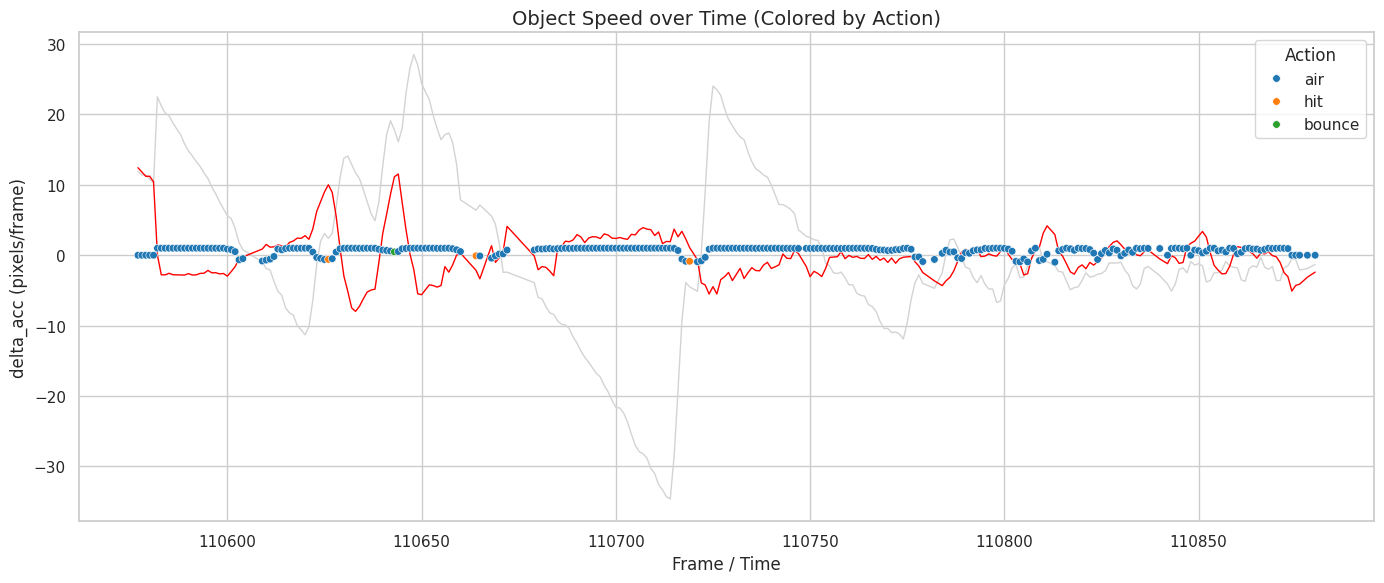

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a style for better visuals
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(14, 6))

# 1. Plot the CONNECTING LINE (Gray)
# This shows the sequence/trend even if points are far apart.
# We use alpha (transparency) so it doesn't distract from the colors.
plt.plot(df.index, df['slope_change_y'], color='lightgray', linewidth=1, zorder=1)
plt.plot(df.index, df['delta_speed'], color='red', linewidth=1, zorder=1)

# 2. Plot the COLORED POINTS (Action)
# We use seaborn's scatterplot because it handles categorical legends automatically.
sns.scatterplot(
    data=df, 
    x=df.index, 
    y='smoothness_angle', 
    hue='action',    # This automatically assigns a color per action
    palette='tab10', # A distinct color palette
    s=30,            # Size of dots
    zorder=2         # Ensure dots sit ON TOP of the gray line
)

# 3. Labeling
plt.title('Object Speed over Time (Colored by Action)', fontsize=14)
plt.xlabel('Frame / Time')
plt.ylabel('delta_acc (pixels/frame)')
plt.legend(title='Action', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
df.head()

,x,y,visible,action,inst_speed,speed_pre,speed_post,delta_speed,inst_acc,acc_pre,...,dx,dy,smoothness_angle,slope_x_pre,slope_y_pre,slope_x_post,slope_y_post,slope_change_x,slope_change_y,total_slope_change
110577,837,670,True,air,0.000000,0.0,12.428427,12.428427,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.000000e-01,11.9,4.000000e-01,11.9,11.906721
110578,837,656,True,air,14.000000,0.0,11.828427,11.828427,14.000000,0.0,...,0.0,-14.0,0.0,0.0,0.0,-7.610958e-14,11.4,-7.610958e-14,11.4,11.400000
110579,835,642,True,air,14.142136,0.0,11.209072,11.209072,0.142136,0.0,...,-2.0,-14.0,0.0,0.0,0.0,2.000000e-01,11.4,2.000000e-01,11.4,11.401754
110580,835,632,True,air,10.000000,0.0,11.219047,11.219047,-4.142136,0.0,...,0.0,-10.0,0.0,0.0,0.0,5.000000e-01,10.8,5.000000e-01,10.8,10.811568
110581,835,619,True,air,13.000000,0.0,10.430124,10.430124,3.000000,0.0,...,0.0,-13.0,0.0,0.0,0.0,4.000000e-01,10.3,4.000000e-01,10.3,10.307764


In [12]:
df.isna().sum()

x                     0
y                     0
visible               0
action                0
inst_speed            0
speed_pre             0
speed_post            0
delta_speed           0
inst_acc              0
acc_pre               0
acc_post              0
delta_acc             0
std_acc_pre           0
std_acc_post          0
stability_change      0
delta_x_pre           1
delta_y_pre           1
delta_x_post          6
delta_y_post          6
dx                    0
dy                    0
smoothness_angle      0
slope_x_pre           0
slope_y_pre           0
slope_x_post          0
slope_y_post          0
slope_change_x        0
slope_change_y        0
total_slope_change    0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

df_model=df.drop(columns=['visible','action'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_model['cluster'] = kmeans.fit_predict(X_scaled)


In [19]:
action_df = df[['action']]
merge_df = action_df.merge(df_model[['cluster']], left_index=True, right_index=True)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the contingency table
# Rows = Actual Actions (Ground Truth)
# Columns = Predicted Clusters (0, 1, 2)
crosstab = pd.crosstab(merge_df['action'], merge_df['cluster'])

print("--- Confusion Matrix (Counts) ---")
print(crosstab)

--- Confusion Matrix (Counts) ---
cluster   0   1    2
action              
air      45  87  142
bounce    0   1    0
hit       1   2    0


In [25]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# 1. Select features
# Use a mix of position derivatives and stats

# 2. Prepare data (Drop NaNs)
df_ml = df_model.dropna().copy()

# 3. Standardize (Crucial for Isolation Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# 4. Fit Isolation Forest
# contamination=0.01 means "I expect about 1% of my data to be anomalies"
iso = IsolationForest(contamination=0.1, random_state=42)
df_ml['anomaly_score'] = iso.fit_predict(X_scaled)

# Map back (-1 = Anomaly, 1 = Normal)
df.loc[df_ml.index, 'is_anomaly_if'] = df_ml['anomaly_score'] == -1

# Inspect
print(f"Found {df['is_anomaly_if'].sum()} ML anomalies.")

Found 28 ML anomalies.


In [26]:
anomalies = df[df['is_anomaly_if']]
anomalies

,x,y,visible,action,inst_speed,speed_pre,speed_post,delta_speed,inst_acc,acc_pre,...,dy,smoothness_angle,slope_x_pre,slope_y_pre,slope_x_post,slope_y_post,slope_change_x,slope_change_y,total_slope_change,is_anomaly_if
110578,837,656,True,air,14.000000,0.000000,11.828427,11.828427,14.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,-7.610958e-14,11.400000,-7.610958e-14,11.400000,11.400000,True
110579,835,642,True,air,14.142136,0.000000,11.209072,11.209072,0.142136,0.000000,...,-14.000000,0.000000,0.000000,0.000000,2.000000e-01,11.400000,2.000000e-01,11.400000,11.401754,True
110580,835,632,True,air,10.000000,0.000000,11.219047,11.219047,-4.142136,0.000000,...,-10.000000,0.000000,0.000000,0.000000,5.000000e-01,10.800000,5.000000e-01,10.800000,10.811568,True
110581,835,619,True,air,13.000000,0.000000,10.430124,10.430124,3.000000,0.000000,...,-13.000000,0.000000,0.000000,0.000000,4.000000e-01,10.300000,4.000000e-01,10.300000,10.307764,True
110582,835,608,True,air,11.000000,10.228427,10.240099,0.011672,-2.000000,2.600000,...,-11.000000,1.000000,-0.600000,-12.600000,4.000000e-01,9.900000,1.000000e+00,22.500000,22.522211,True
110643,963.460396,453.509901,True,bounce,1.559602,5.624666,16.764429,11.139763,-5.511465,0.282843,...,-1.490099,0.476244,4.400000,-1.600000,-2.700000e+00,16.200000,-7.100000e+00,17.800000,19.163768,True
110645,970,416,True,air,21.840330,6.682137,14.169272,7.487135,5.321613,2.087191,...,-21.000000,0.919145,3.346040,-4.249010,-2.200000e+00,13.800000,-5.546040e+00,18.049010,18.881878,True
110664,995.638614,244.351485,True,hit,17.652214,6.979864,4.839599,-2.140265,11.652214,-0.449242,...,-17.648515,-0.084728,2.600000,-5.600000,4.500000e+00,0.800000,1.900000e+00,6.400000,6.676077,True
110668,984,241,True,air,12.369317,6.857066,8.215934,1.358869,11.865192,-2.053241,...,-3.000000,-0.417168,0.763861,-7.964851,7.100000e+00,-2.400000,6.336139e+00,5.564851,8.432925,True
110669,980,238,True,air,5.000000,8.436502,7.415934,-1.020568,-7.369317,1.579436,...,-3.000000,-0.096068,-2.400000,-7.200000,9.200000e+00,-2.800000,1.160000e+01,4.400000,12.406450,True


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

df_model=anomalies.drop(columns=['visible','action'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_model['cluster'] = kmeans.fit_predict(X_scaled)


In [28]:
action_df = anomalies[['action']]
merge_df = action_df.merge(df_model[['cluster']], left_index=True, right_index=True)

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the contingency table
# Rows = Actual Actions (Ground Truth)
# Columns = Predicted Clusters (0, 1, 2)
crosstab = pd.crosstab(merge_df['action'], merge_df['cluster'])

print("--- Confusion Matrix (Counts) ---")
print(crosstab)

--- Confusion Matrix (Counts) ---
cluster   0  1  2
action           
air      11  6  8
bounce    1  0  0
hit       1  0  1
